In [1]:
import sys
sys.path.append("../")

import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import math
from random import shuffle, choice
import copy
from utils import *
from engine import *
from IPython.display import clear_output
import time
import datetime
import re

In [36]:
import matplotlib.pyplot as plt
import seaborn

In [6]:
df = pd.read_excel('../data/New Way SCH W3-W6, W14 08.24.20.xlsx',
                   sheet_name='WAY 14')

# the input schedule appears as a data table on the dashboard
# this is used to select what to deckle
df_input_schedule = pd.read_excel('../data/200721_ New Way SCH W3-W6 W14 07.20.20.xlsx',
                   sheet_name='Schedule')
df_input_schedule.insert(1, 'Technology', df_input_schedule['Description'].apply(lambda x: parse_description(x, 'tech')))
df_input_schedule.insert(2, 'Color', df_input_schedule['Description'].apply(lambda x: x.split(';')[1] if type(x) == str else None))
df_input_schedule.insert(3, 'Width', df_input_schedule['Description'].apply(lambda x: parse_description(x, 'width')))
df_input_schedule = df_input_schedule[[col for col in df_input_schedule.columns if 'Unnamed' not in str(col)]]
df_input_schedule['Total LM Order QTY'] = df_input_schedule['Total LM Order QTY'].round(1)
dfip = df_input_schedule

In [18]:
dfip.columns

Index(['SPM375014                               PROD. DATE',
                                               'Technology',
                                                    'Color',
                                                    'Width',
                                           'CYCLE / BUCKET',
                                            'Customer Name',
                                                  'Item No',
                                                      'WO#',
                                              'Description',
                                                'Treatment',
                                                       'KG',
                                         'Hours To Produce',
                                                  'Polymer',
                                                'Core Size',
                                                 'LM putup',
                                            'Roll Diameter',
                        

In [35]:
dfip['Customer Name'].unique()

array(['P & G', nan, 'FIRST QUALITY PRODUCTS', 'PRECEPT MEDICAL',
       'CARDINAL HEALTH', 'AHP', 'IRVING CONSUMER PRODUCTS',
       'GRIFFIN CARE', datetime.datetime(2020, 8, 4, 0, 0),
       datetime.datetime(2020, 8, 5, 0, 0), 'CHANGE OVER',
       'FIRST QUALITY RETAIL SERVICE', 'IRVING PERSONAL CARE',
       'Allotted trial time', datetime.datetime(2020, 10, 6, 0, 0),
       datetime.datetime(2020, 10, 7, 0, 0), 'ARIUM CHANGE OVER'],
      dtype=object)

In [37]:
def dfScatter(df, xcol='Height', ycol='Weight', catcol='Gender'):
    fig, ax = plt.subplots()
    categories = np.unique(df[catcol])
    colors = np.linspace(0, 1, len(categories))
    colordict = dict(zip(categories, colors))  

    df["Color"] = df[catcol].apply(lambda x: colordict[x])
    ax.scatter(df[xcol], df[ycol], c=df.Color)
    return fig

In [52]:
# Tableau 20 Colors
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),  
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),  
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),  
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]

In [51]:
categories = dfip['Customer Name'].unique()
colors = np.linspace(0, 1, len(categories))
colordict = dict(zip(categories, colors))
dfip['Color'] = dfip['Customer Name'].apply(lambda x: colordict[x])

0      0.0000
1      0.0000
2      0.0000
3      0.0000
4      0.0000
5      0.0000
6      0.0000
7      0.0000
8      0.0000
9      0.0000
10     0.0000
11     0.0000
12     0.0000
13     0.0000
14     0.0000
15     0.0000
16     0.0000
17     0.0000
18     0.0000
19     0.0000
20     0.0000
21     0.0000
22     0.0000
23     0.0000
24     0.0000
25     0.0000
26     0.0000
27     0.0000
28     0.0000
29     0.0000
        ...  
330    0.3125
331    0.0625
332    0.2500
333    0.0625
334    0.0000
335    0.3750
336    0.0625
337    0.4375
338    0.8125
339    0.6250
340    0.0000
341    0.0625
342    0.0000
343    0.6250
344    0.3125
345    0.0625
346    0.2500
347    0.0625
348    0.0000
349    0.8125
350    0.6250
351    0.0000
352    0.0625
353    0.3125
354    0.0625
355    0.2500
356    0.0625
357    0.0000
358    0.3750
359    0.8125
Name: Color, Length: 360, dtype: float64

ValueError: Invalid RGBA argument: 0.0

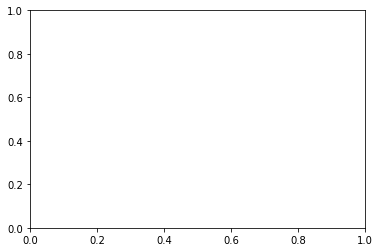

In [50]:
pd.DataFrame(dfip.groupby(['Description', 'Customer Name', 'Color'])['Total LM Order QTY']\
             .sum()).reset_index().plot(kind='barh', x='Description', y='Total LM Order QTY', color=dfip.Color)

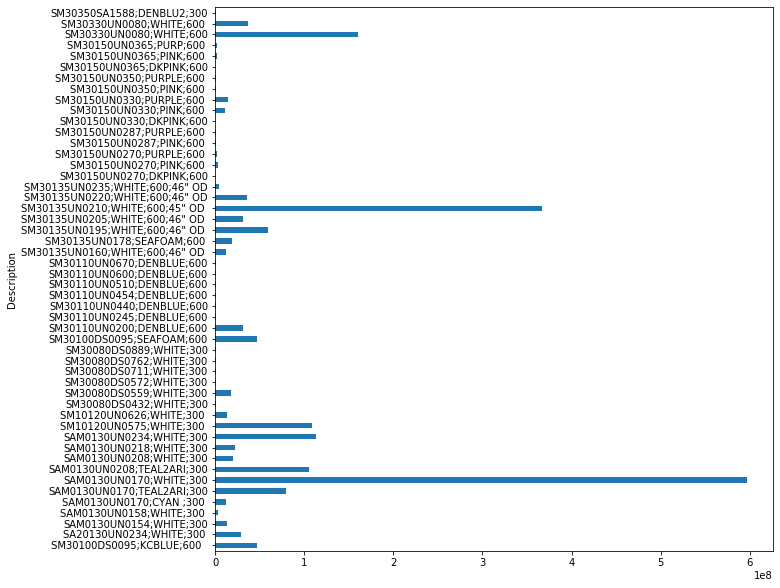

In [22]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
dfip.groupby(['Description'])['Total LM Order QTY'].sum().plot(kind='barh', ax=ax)